# Classifying images
* multi-class
* fashion mnist dataset - 10 categories
images as a matrix
* pixel values (R,G,B) = 3 channel
* grayscale = range(0,1) intensity = 1 channel
* channels defines the number of items in the 3rd dimension
* list of image s= 4d matrix
* images all need to be the same size
    * list dimensions (10, 6, 6,3) = (image_ct, width, height, channels)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

from sklearn.linear_model import LogisticRegression, SGDClassifier


<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
fashion_mnist_df = pd.read_csv('datasets/fashion-mnist_train.csv')#28 x 28 x grayscale
#simplified version of regular mnist

In [3]:
fashion_mnist_df.head()
#labels correspond to fashion accessories

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
fashion_mnist_df.shape

(60000, 785)

In [6]:
28*28

784

In [7]:
fashion_mnist_df = fashion_mnist_df.sample(frac=.3).reset_index(drop=True)
fashion_mnist_df.shape

(18000, 785)

In [11]:
LOOKUP = dict(zip(range(10),
             ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']))
LOOKUP

{0: 'T-shirt',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

In [12]:
def display_image(features, actual_label):
    print("Actual label: ", LOOKUP[actual_label])
    
    plt.imshow(features.reshape(28,28))

In [22]:
X = fashion_mnist_df[fashion_mnist_df.columns[1:]]
Y = fashion_mnist_df['label']

In [23]:
Y.head()

0    1
1    0
2    1
3    8
4    5
Name: label, dtype: int64

In [24]:
X.loc[5].values[:100]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,  30,  43,   0,   0,
         0,   0,   0,   0,  25,  22,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 185, 199,
       159,  41,   0,   0,  49, 147, 193, 213,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
       153, 183, 189, 214, 255, 253, 209, 200, 179, 161,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0, 182, 182, 170, 157, 174, 171, 165], dtype=int64)

In [25]:
Y.loc[5]

3

Actual label:  Dress


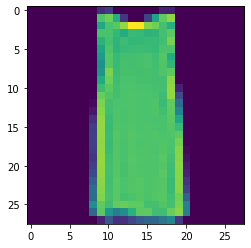

In [26]:
display_image(X.loc[5].values, Y.loc[5])

Actual label:  Coat


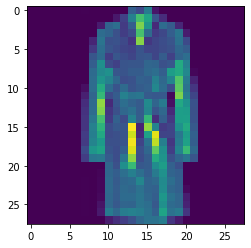

In [27]:
display_image(X.loc[567].values, Y.loc[567])

Actual label:  Dress


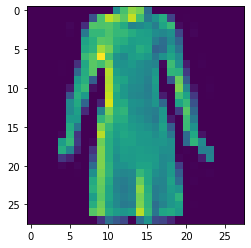

In [28]:
display_image(X.loc[15088].values, Y.loc[15088])

In [29]:
X=X/255. #divide by max value to get inensity 0-1
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.407843,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.070588,0.113725,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.878431,0.909804,0.921569,0.745098,0.819608,0.894118,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [31]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=.2)

In [32]:
x_train.shape, y_train.shape

((14400, 784), (14400,))

In [34]:
#logistic regression only works with simple images
#neural network needed for larger images
#helper function
def summarize_classification(y_test, y_pred, avg_method='weighted'):
    acc=accuracy_score(y_test, y_pred, normalize=True)#fraction %
    num_acc = accuracy_score(y_test, y_pred, normalize=False)#raw number
    
    prec=precision_score(y_test, y_pred, average='weighted')#need weighted average for multi-class
    #weights depend on the number of true instances
    recall = recall_score(y_test, y_pred, average = avg_method)
    res = {'test data count':len(y_test), 'accuracy count':num_acc, 'accuracy':acc, 'precision':prec, 'recall':recall}
    print(res,"\n")
    return res

In [35]:
%%time
#COULD TAKE 15 MINUTSE
logistic_model = LogisticRegression(solver='sag', multi_class='auto', max_iter=10000).fit(x_train, y_train)
#using solver = sag (optimization) - converges faster with large datasets - hanldes multinomial loss
#liblinear doesn't handle multinomial loss - does multi-class with one_vs_rest scheme

In [36]:
y_pred = logistic_model.predict(x_test)
y_pred

array([5, 8, 8, ..., 1, 9, 0], dtype=int64)

In [37]:
summarize_classification(y_test, y_pred)
#83% = quite high

{'test data count': 3600, 'accuracy count': 3045, 'accuracy': 0.8458333333333333, 'precision': 0.844390147914577, 'recall': 0.8458333333333333} 



{'test data count': 3600,
 'accuracy count': 3045,
 'accuracy': 0.8458333333333333,
 'precision': 0.844390147914577,
 'recall': 0.8458333333333333}